In [1]:
#Import libraries
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import os
import pandas as pd 


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.


In [3]:
os.listdir('/content/drive/My Drive/projectDS')

['shipsnet.json', 'scenes', 'shipsnet']

In [4]:

with open('/content/drive/My Drive/projectDS/shipsnet.json') as data_file:
    dataset = json.load(data_file)
Shipsnet= pd.DataFrame(dataset)
print(Shipsnet.head())
print('')    
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

                                                data  ...             scene_ids
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...  ...  20180708_180909_0f47
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...  ...  20170705_180816_103e
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...  ...  20180712_211331_0f06
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...  ...  20170609_180756_103a
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...  ...  20170515_180653_1007

[5 rows x 4 columns]



In [5]:
input_data.shape
#ds contains 4000 images
#vector length 19200 elements

(4000, 19200)

In [6]:
output_data.shape

(4000,)

In [7]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [8]:
np.bincount(output_data)
#3000 are ships 
#1000 not ships

array([3000, 1000])

In [9]:
print(len(os.listdir('/content/drive/My Drive/projectDS/shipsnet/shipsnet')))
print(len(os.listdir('/content/drive/My Drive/projectDS/scenes/scenes')))


4000
8


In [10]:
base_dir = '/content/drive/My Drive/projectDS'
train_dir = os.path.join(base_dir,'shipsnet')
validation_dir = os.path.join(base_dir,'shipsnet')
#training with snest and scense images
train_shipsnet=os.path.join(train_dir,'shipsnet')
validation_shipsnet=os.path.join(validation_dir,'shipsnet')

In [11]:
data_file_dir = os.listdir(train_shipsnet)
data_file_dir[:4]

['1__20170919_181711_0e20__-122.32706793158978_37.73619432730002.png',
 '1__20180708_180453_0f28__-118.16017519031635_33.735042630685086.png',
 '1__20170717_180818_1010__-122.35291186187388_37.75161631965994.png',
 '0__20171127_181538_101e__-122.22148654171757_37.72975787471162.png']

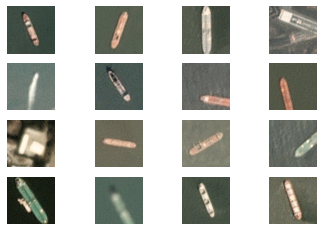

In [12]:
#Visualisation of images
import matplotlib.pyplot as plt
j=1 #plot position
for i in range(16):
  img = plt.imread(os.path.join(train_shipsnet,data_file_dir[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.axis('off')
  j+=1

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.


In [14]:
train_generator

In [15]:
#building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [18]:
model=Sequential()
#add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
#convert feature map in 1d array
model.add(Flatten())
#fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
#final op layer
model.add(Dense(1,activation='softmax'))

#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [19]:
#complie the model
import tensorflow as tf

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#fit
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
 99/200 [=============>................] - ETA: 22:01 - loss: 0.0000e+00 - accuracy: 1.0000

KeyboardInterrupt: ignored